In [1]:
ts=tsc.loadImagesAsSeries('/mnt/downloads/cropavg/', inputformat='tif-stack',blockSize="10M")
ts.cache()

In [4]:
ss = ts.toSpatialSeries()

In [21]:
cr = ss.localCorr(neighborhood=7)

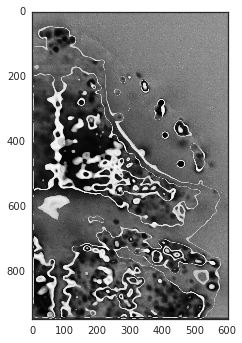

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
img = cr.pack()
plt.imshow(img)

In [4]:
from thunder import PCA, RegressionModel

In [5]:
norm=ts.normalize(baseline='percentile')

In [3]:
filtered=norm.filterOnValues(lambda x: numpy.amax(x) > 0.2)

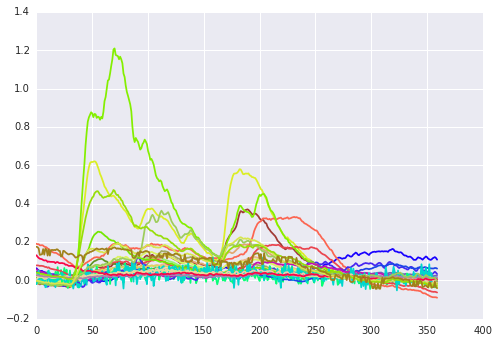

In [8]:
from thunder import KMeans, Colorize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
modelK=KMeans(k=30).fit(norm)
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

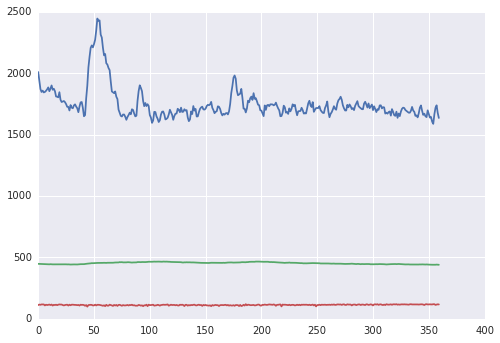

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
plt.plot(ts.max());
plt.plot(ts.mean());
plt.plot(ts.min());

In [4]:
tts = norm.toTimeSeries()

In [9]:
ccr=tts.crossCorr(vis1, lag=5)

In [8]:
import numpy as np
vis1=np.zeros((360),dtype=np.int)
vis1.flat[30:80]=1

In [10]:
from thunder import PCA
modelcc=PCA(k=3).fit(ccr)

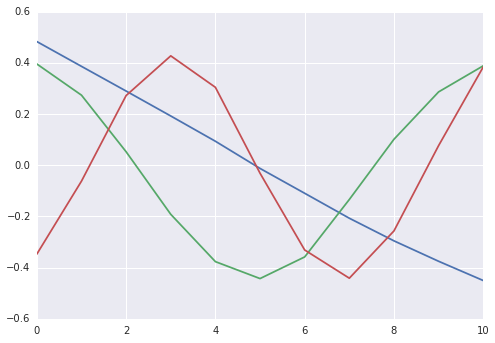

In [11]:
sns.set_style('darkgrid')
plt.plot(modelcc.comps.T);

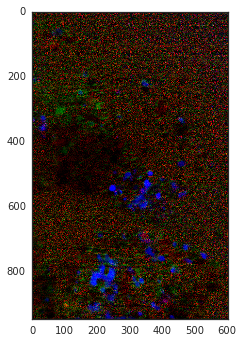

In [12]:
imgs = modelcc.scores.pack()
from thunder import Colorize
from numpy import amax
maps = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs)
sns.set_style('white')
plt.imshow(maps);

In [13]:
vis2=np.zeros((360),dtype=np.int)
vis2.flat[90:120]=1

In [14]:
ccr2=tts.crossCorr(vis2, lag=5)

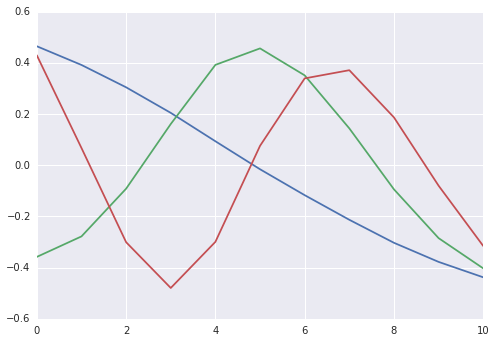

In [15]:
from thunder import PCA
modelcc2=PCA(k=3).fit(ccr2)
sns.set_style('darkgrid')
plt.plot(modelcc2.comps.T)

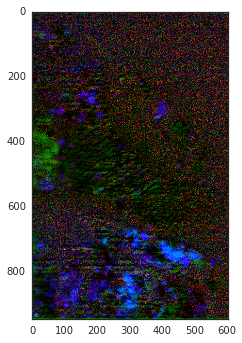

In [16]:
imgs2 = modelcc2.scores.pack()
maps2 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs2)
sns.set_style('white')
plt.imshow(maps2);

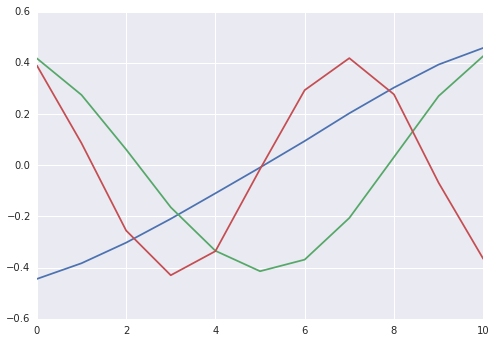

In [17]:
vis3=np.zeros((360),dtype=np.int)
vis3.flat[130:150]=1
ccr3=tts.crossCorr(vis3, lag=5)
modelcc3=PCA(k=3).fit(ccr3)
sns.set_style('darkgrid')
plt.plot(modelcc3.comps.T)

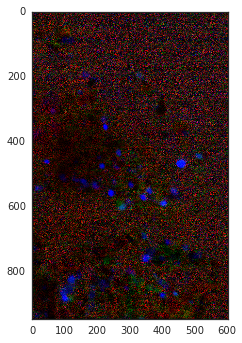

In [19]:
imgs3 = modelcc3.scores.pack()
maps3 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs3)
sns.set_style('white')
plt.imshow(maps3);

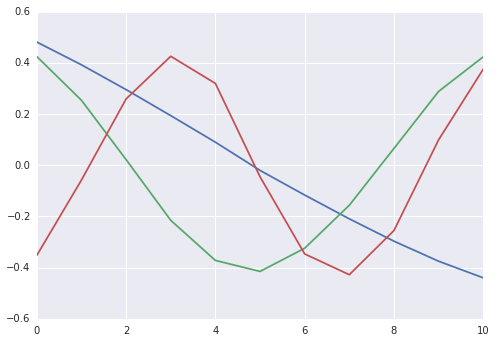

In [20]:
vis4=np.zeros((360),dtype=np.int)
vis4.flat[160:210]=1
ccr4=tts.crossCorr(vis4, lag=5)
modelcc4=PCA(k=3).fit(ccr4)
sns.set_style('darkgrid')
plt.plot(modelcc4.comps.T)

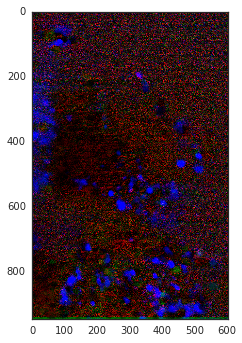

In [21]:
imgs4 = modelcc4.scores.pack()
maps4 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs4)
sns.set_style('white')
plt.imshow(maps4);

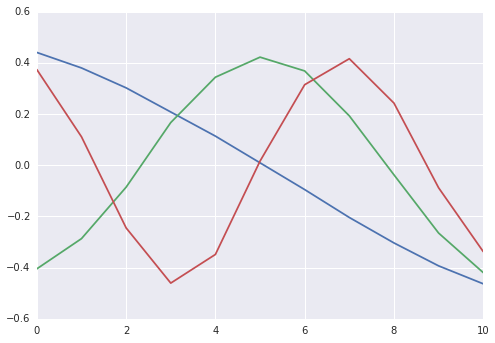

In [22]:
aud=np.zeros((360),dtype=np.int)
aud.flat[300:340]=1
ccra=tts.crossCorr(aud, lag=5)
modelcca=PCA(k=3).fit(ccra)
sns.set_style('darkgrid')
plt.plot(modelcca.comps.T)

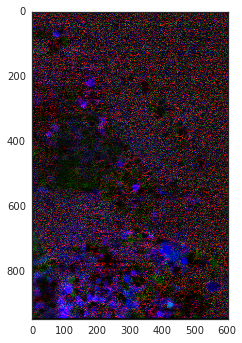

In [23]:
imgsa = modelcca.scores.pack()
mapsa = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgsa)
sns.set_style('white')
plt.imshow(mapsa);

In [24]:
tot=np.zeros((360),dtype=np.int)
tot.flat[300:340]=1
tot.flat[160:210]=1
tot.flat[130:150]=1
tot.flat[90:120]=1
tot.flat[30:80]=1

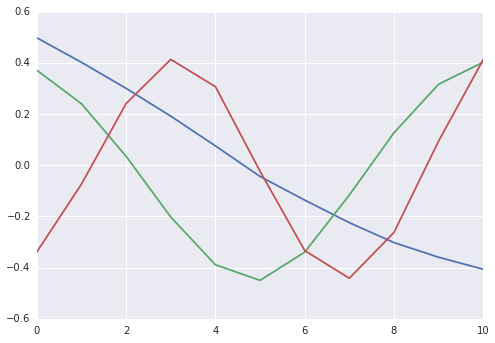

In [25]:
ccrt=tts.crossCorr(tot, lag=5)
modelcct=PCA(k=3).fit(ccrt)
sns.set_style('darkgrid')
plt.plot(modelcct.comps.T)

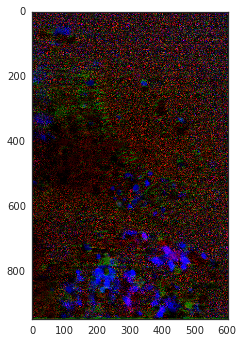

In [26]:
imgst = modelcct.scores.pack()
mapst = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgst)
sns.set_style('white')
plt.imshow(mapst);

In [75]:
ccrtot=tts.crossCorr(tot, lag=3)

In [76]:
imgtot=ccrtot.pack()

In [80]:
maptot=Colorize(totype='indexed', colors=[ "red", "peru",  "Purple", "blue", "cornflowerblue", "Aqua", "green"], scale=2).images(imgtot)

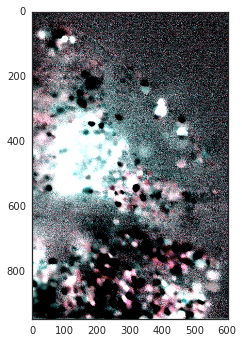

In [81]:
sns.set_style('white')
plt.imshow(maptot)

In [30]:
from thunder import RegressionModel

In [27]:
ts=ts.detrend('linear')

In [28]:
norm=ts.normalize(baseline='percentile')

In [29]:
from numpy import sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
shape(aud)

(360,)

In [3]:
test = np.zeros((5,360),dtype=np.int)

NameError: name 'np' is not defined

In [109]:
test[0,29:79]=1
test[1,89:119]=1
test[2,129:150]=1
test[3,159:209]=1
test[4,299:339]=1

In [110]:
model = RegressionModel.load(test, "linear")

In [111]:
results = model.fit(tts)

In [112]:
results.select('betas').first()

((0, 0, 0),
 array([ 0.00576988,  0.01649689,  0.00479416,  0.0008673 , -0.00953496]))

In [9]:
pca=PCA(k=3)
pca.fit(results.select('betas'))

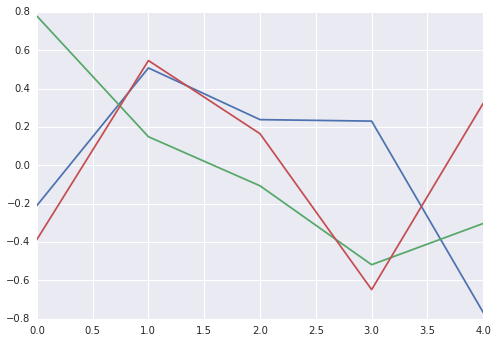

In [10]:
plt.plot(pca.comps.T)

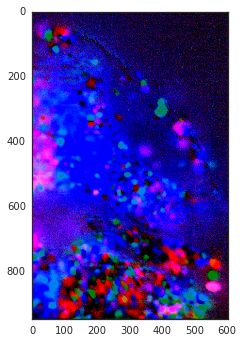

In [11]:
img = pca.scores.pack()
maps = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(img)
sns.set_style('white')
plt.imshow(maps)

In [12]:
betas=results.select('betas').pack()

In [48]:
betas[0,]

array([[ 0.01174763,  0.09949139, -0.06034689, ...,  0.02745423,
         0.03107038,  0.05829651],
       [ 0.04596376,  0.03820461,  0.02669463, ..., -0.03578198,
         0.07427391,  0.08245784],
       [-0.06699682,  0.00449868,  0.00832371, ...,  0.07446386,
         0.01394123, -0.01077142],
       ..., 
       [ 0.01229846,  0.02233624,  0.04757517, ...,  0.03837584,
        -0.04512686, -0.02035151],
       [ 0.01245847,  0.02709868,  0.08595936, ...,  0.03407905,
         0.02171862,  0.00787239],
       [ 0.05833355,  0.07368315,  0.11169109, ...,  0.03592561,
         0.08607819,  0.07858239]])

In [49]:
shape(betas)

(6, 946, 603)

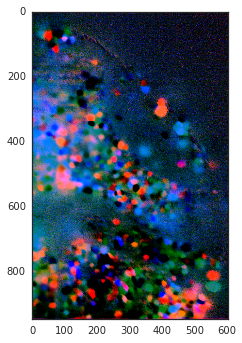

In [13]:
maps = Colorize(totype='indexed', colors=[ "red","green", "blue"], scale=2).images(betas[0:3,])
plt.imshow(maps)

In [14]:
beta1=betas[0,]

In [61]:
shape(beta1)

(946, 603)

<matplotlib.colorbar.Colorbar instance at 0x7fbbe42798c0>

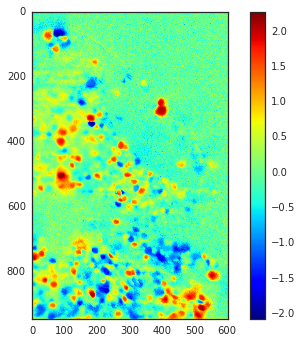

In [15]:
imgplot = plt.imshow(beta1)
imgplot.set_cmap('jet')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fbbe5e61f80>

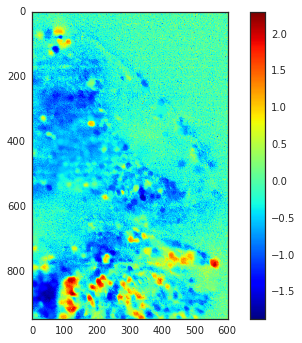

In [26]:
beta1=betas[4,]
sns.set_style('white')
imgplot = plt.imshow(beta1)
imgplot.set_cmap('jet')
plt.colorbar()

In [17]:
from numpy import amin, amax, ravel
vmin = amin(betas)
vmax = amax(betas)

In [18]:
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
norm = colors.Normalize(vmin=vmin, vmax=vmax)

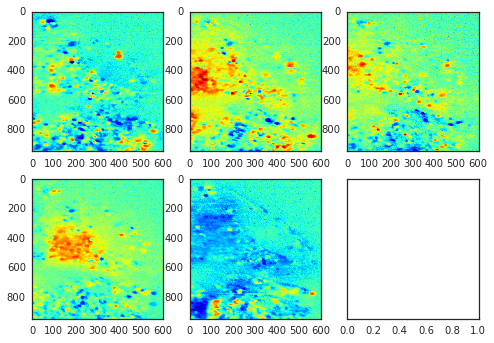

In [19]:
fig = figure(dpi=300)
plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(0,5):
    n=betas[i,]
    plt.subplot(2, 3, i+1)
    plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')


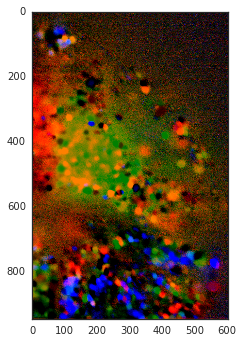

In [20]:
maps = Colorize(totype='indexed', colors=[ "red","green", "blue"], scale=2).images(betas[2:5,])
plt.imshow(maps)

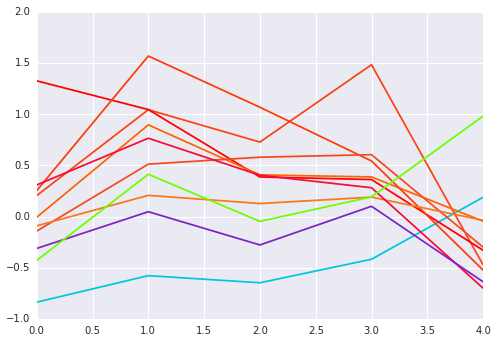

In [21]:
from thunder import KMeans, Colorize
modelK=KMeans(k=10).fit(results.select('betas'))
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

In [2]:
zs=ts.zscore()

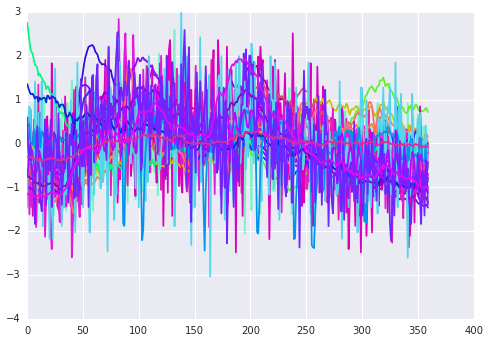

In [6]:
from thunder import KMeans, Colorize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
modelK=KMeans(k=30).fit(zs)
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

In [7]:
import numpy as np
test = np.zeros((5,360),dtype=np.int)
test[0,29:79]=1
test[1,89:119]=1
test[2,129:150]=1
test[3,159:209]=1
test[4,299:339]=1

In [8]:
model = RegressionModel.load(test, "linear")
results = model.fit(zs)

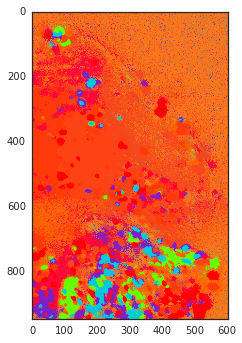

In [32]:
labels = modelK.predict(results.select('betas'))
img_labels = labels.pack()
sns.set_style('white')
brainmap = Colorize(totype=newclrs).images(img_labels)
plt.imshow(brainmap);

In [31]:
labels.keys()

PythonRDD[147] at RDD at PythonRDD.scala:42